### <font color='red'> Hospital Readmission. </font>

![](https://cdn.systematic.com/media/g0sj1tbg/hospital-building-001-global.jpg?mode=crop&width=1200&height=630&center=)

#### This file is a 10 year history of hospital readmission data delineated by various measures of diabetes diagnosis.

#### Our data has 25000 values and 14 columns, Here we will use the "hospital_readmissions.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [2]:
# df = pd.read_csv('/kaggle/input/hospital-readmissions/hospital_readmissions.csv', sep = ',')
df=pd.read_csv("hospital_readmissions.csv")

#### Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.

#### Here the explanation about the variables:
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [9]:
df.head(15)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


In [10]:
value_counts = df['glucose_test'].value_counts()
print(value_counts)

no        23625
normal      689
high        686
Name: glucose_test, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [5]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [6]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [7]:
(df.isnull().sum()/len(df))

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.
- We can see that we don't have strong correlation between the variables.

<AxesSubplot:>

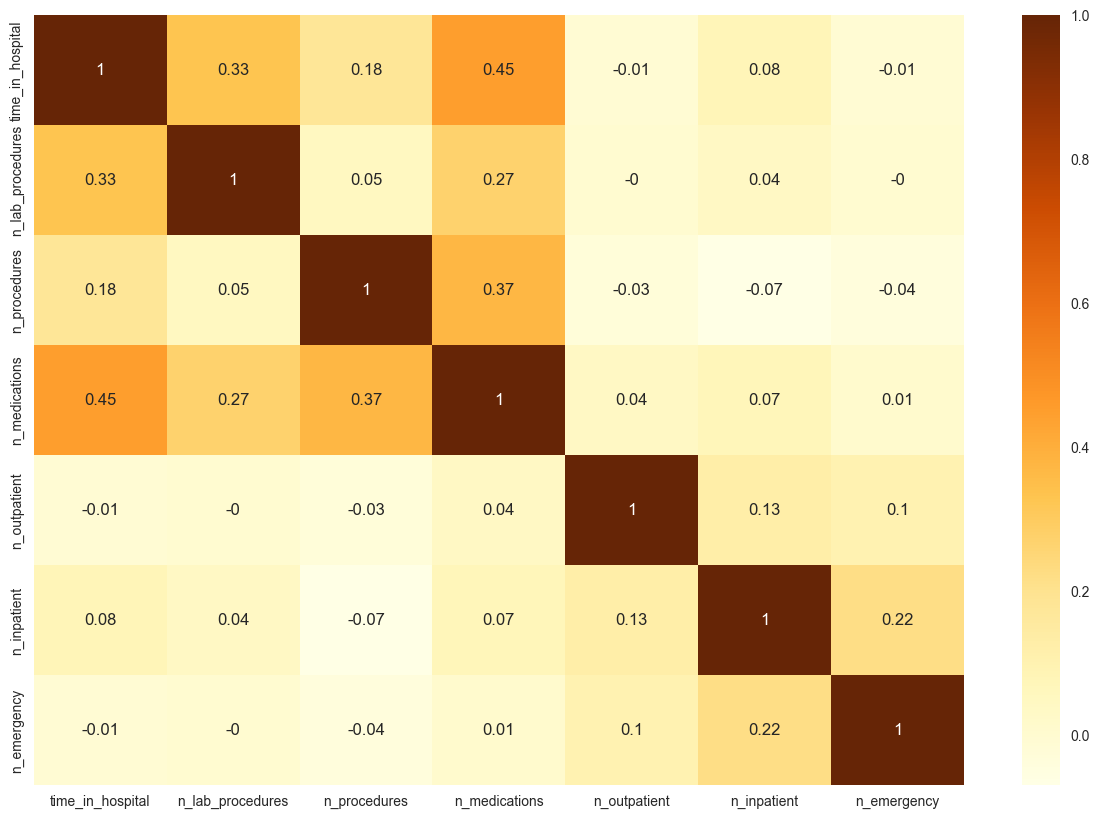

In [8]:
corr = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

#### Categorical Variables

#### looking at our categorical variables we can see that we have some predominant values ​​in our database, looking at the variable n_procedures we can see that the higher the number, the smaller the amount of data, when we check the variable medical_speciality we can see that we have a lot of missing data, when we look at the diagnosis variable we can see that we have different diagnoses in the 3 values.

<AxesSubplot:xlabel='diag_3', ylabel='count'>

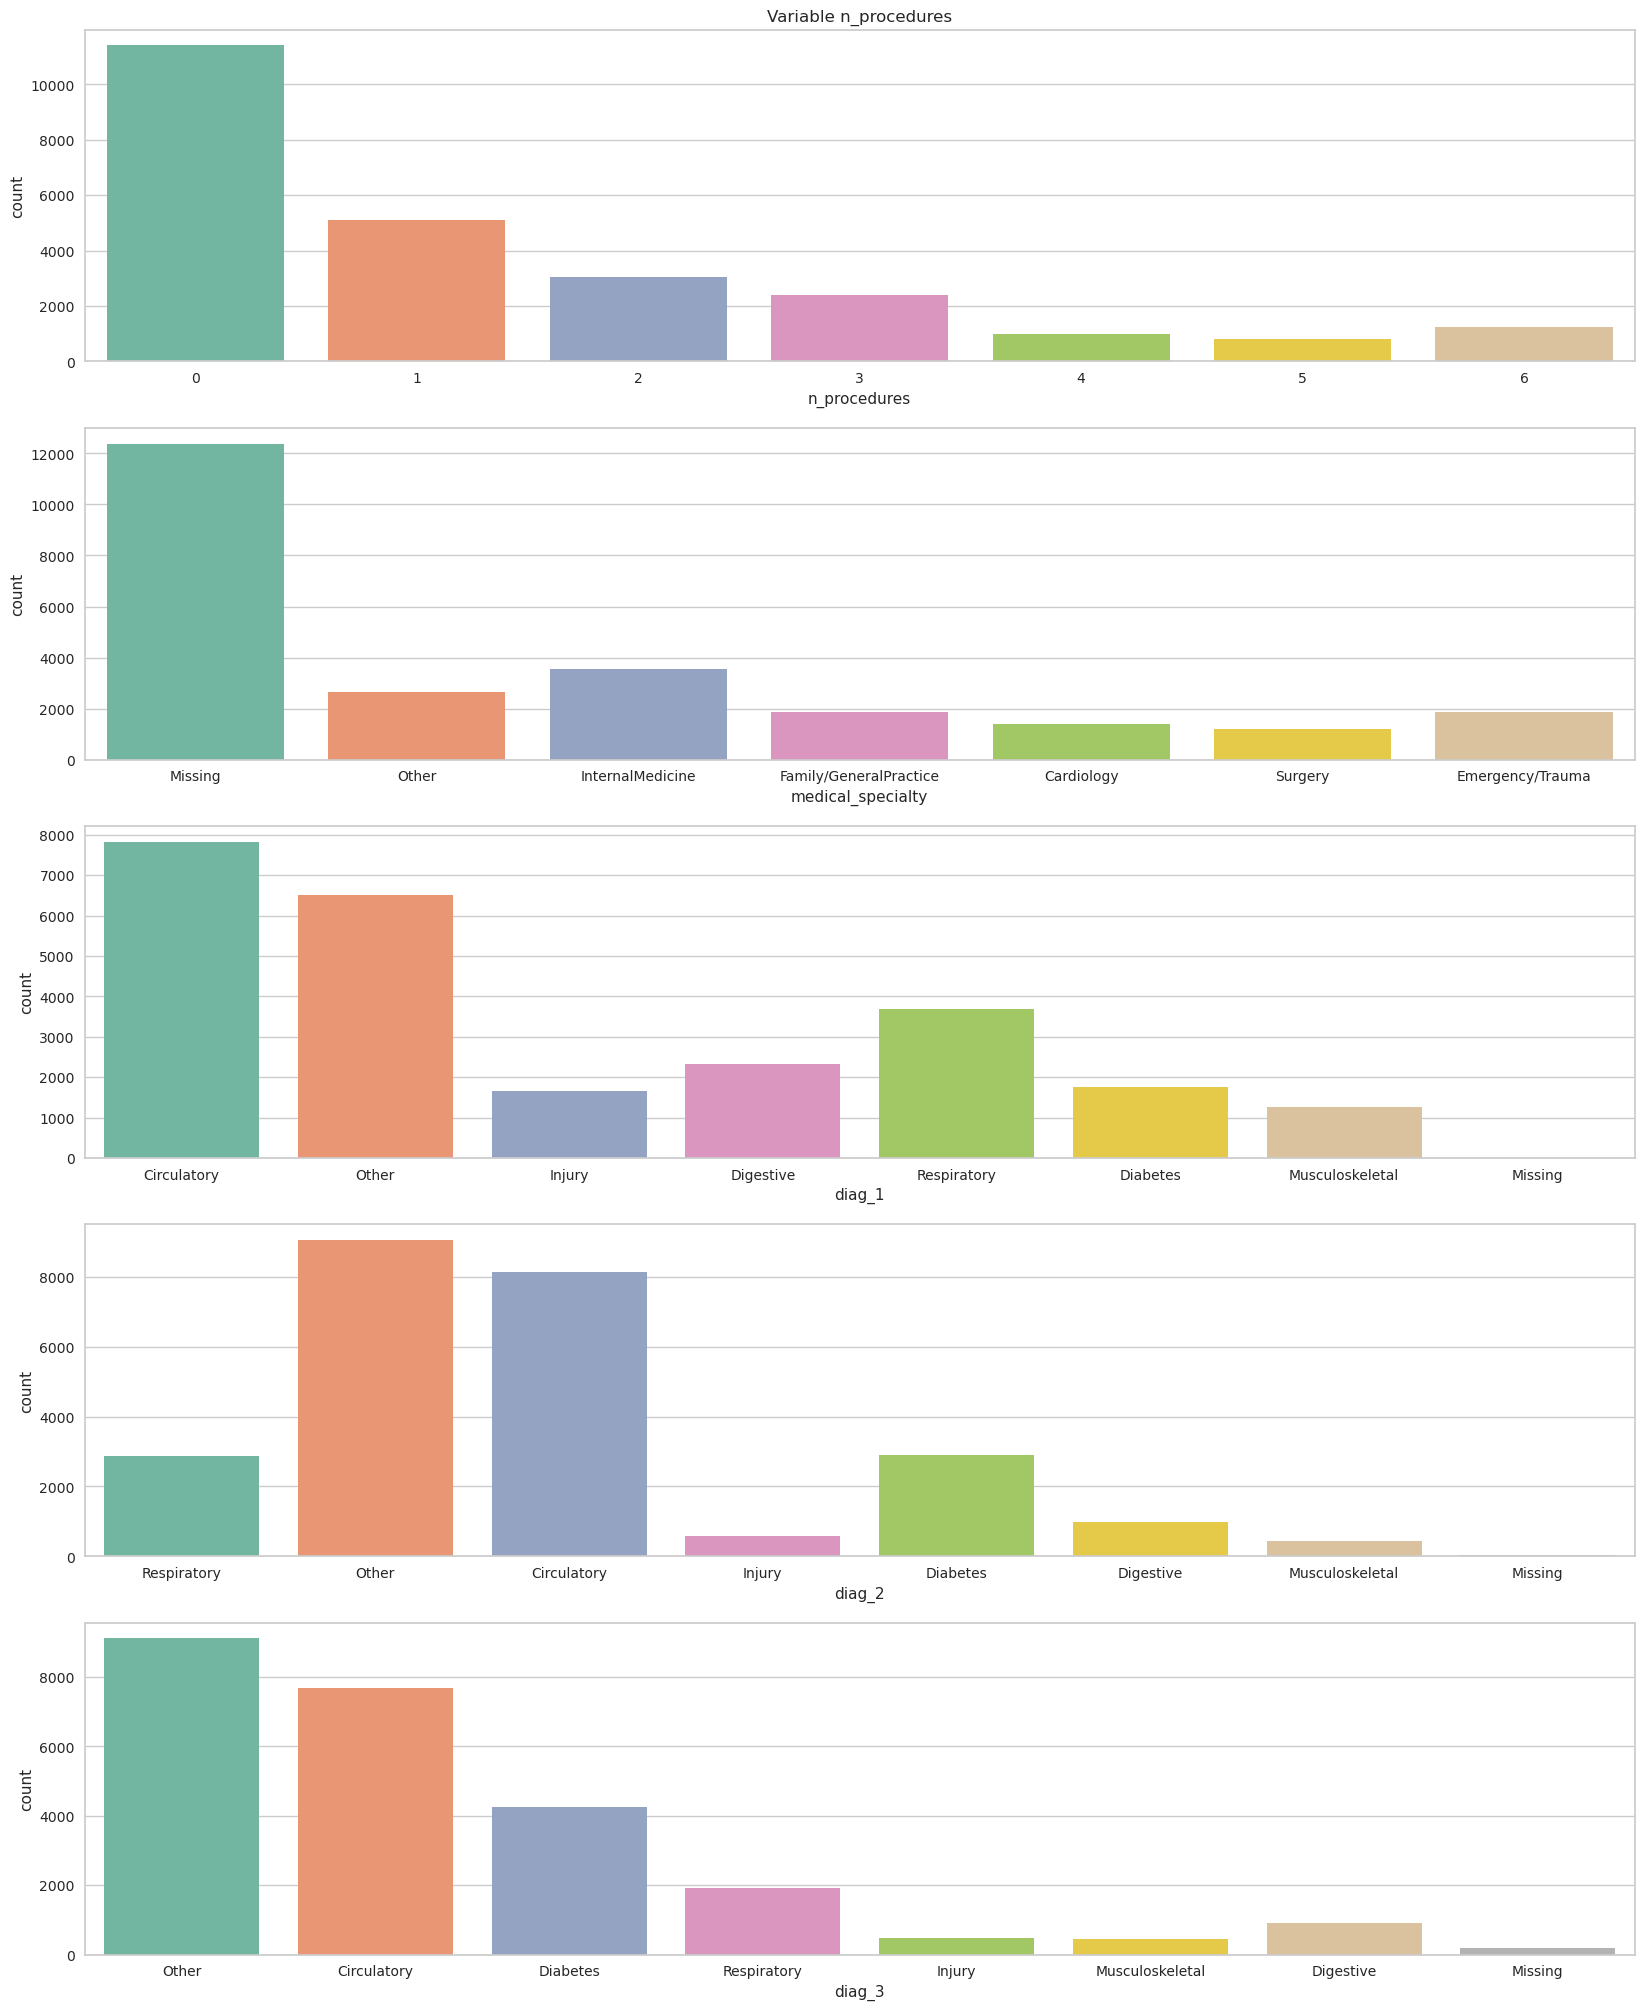

In [9]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 1, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'n_procedures', palette = 'Set2', data = df)

plt.subplot(5, 1, 2)
sns.countplot(x = 'medical_specialty', palette = 'Set2', data = df)

plt.subplot(5, 1, 3)
sns.countplot(x = 'diag_1', palette = 'Set2', data = df)

plt.subplot(5, 1, 4)
sns.countplot(x = 'diag_2', palette = 'Set2', data = df)

plt.subplot(5, 1, 5)
sns.countplot(x = 'diag_3', palette = 'Set2', data = df)

#### Here, looking at the age variable, we can see that most of our patients are older, looking at the glucose, we can see that most of the data do not have a glucose test, the same thing for the A1C test variable, looking at the our target variable we can see that the base is well distributed between the two data.

<AxesSubplot:title={'center':'Variable readmitted'}, xlabel='readmitted', ylabel='count'>

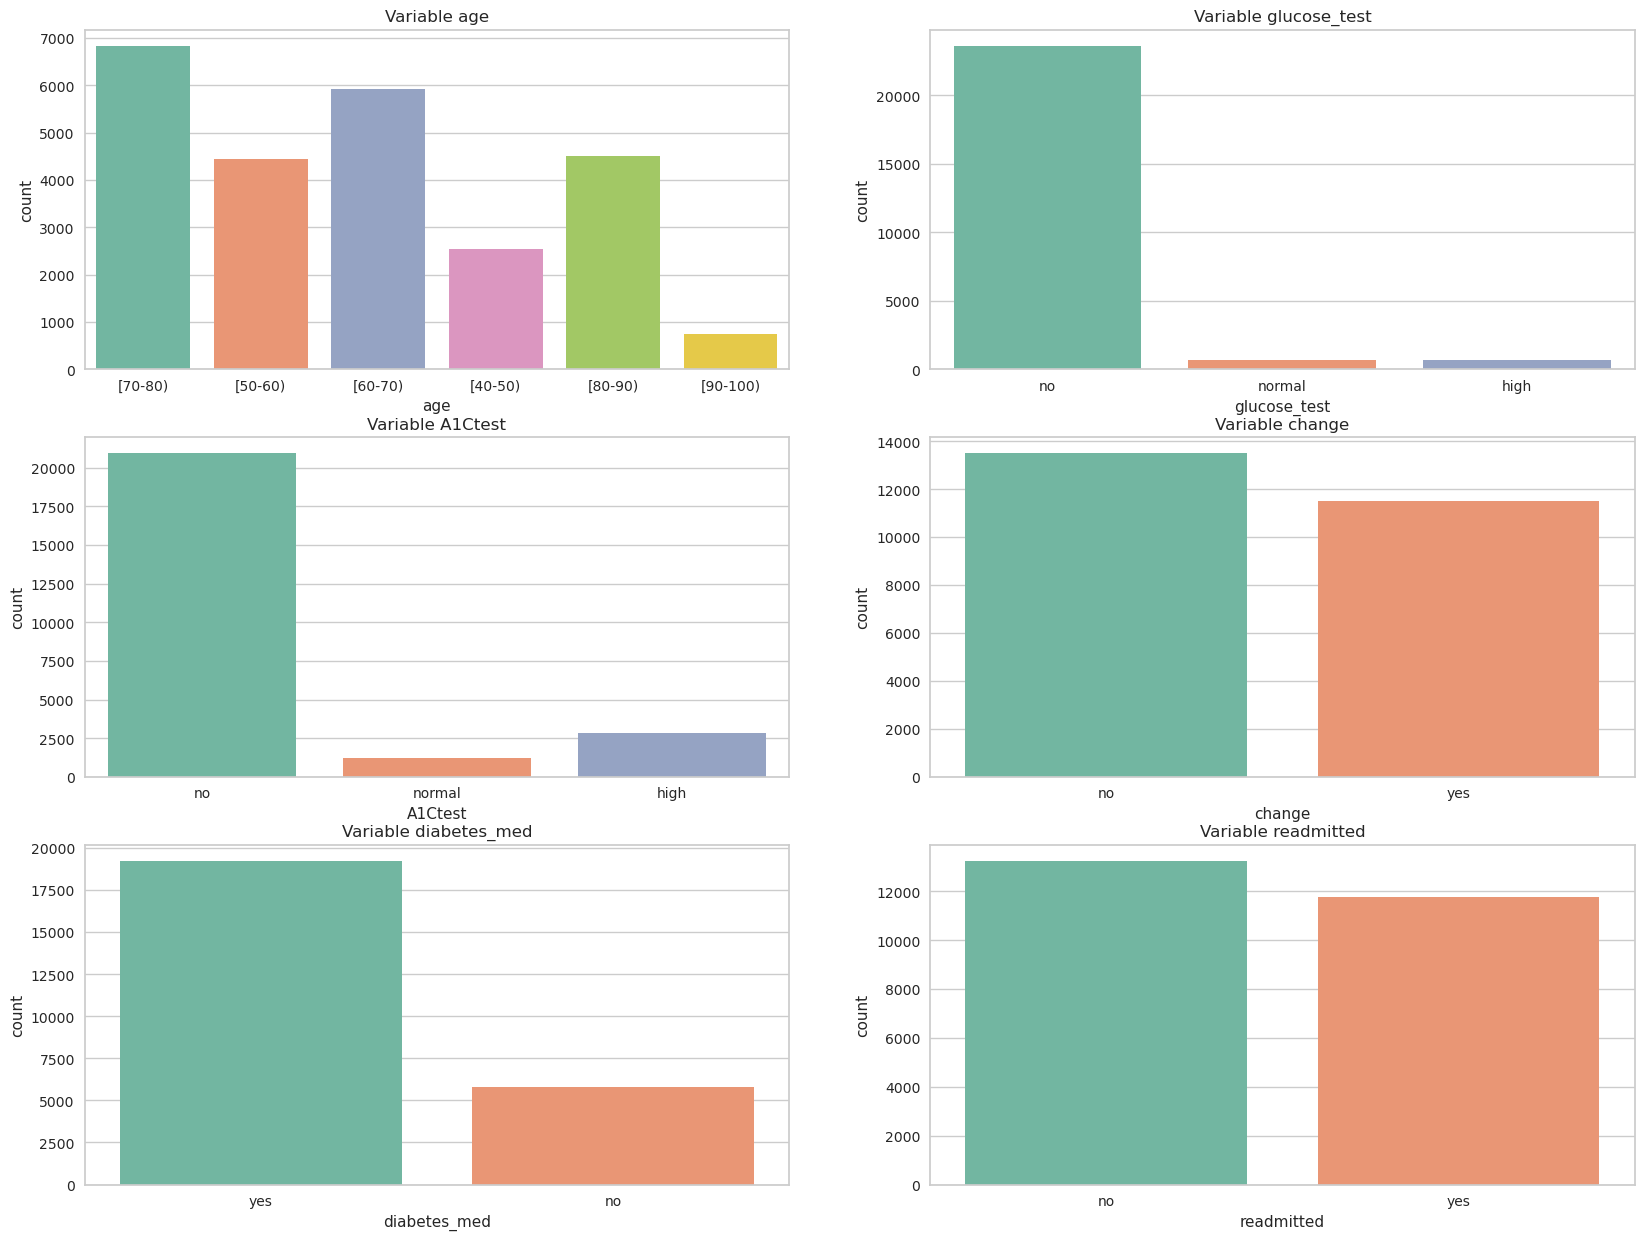

In [7]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 2, 1)
plt.gca().set_title('Variable age')
sns.countplot(x = 'age', palette = 'Set2', data = df)

plt.subplot(3, 2, 2)
plt.gca().set_title('Variable glucose_test')
sns.countplot(x = 'glucose_test', palette = 'Set2', data = df)

plt.subplot(3, 2, 3)
plt.gca().set_title('Variable A1Ctest')
sns.countplot(x = 'A1Ctest', palette = 'Set2', data = df)

plt.subplot(3, 2, 4)
plt.gca().set_title('Variable change')
sns.countplot(x = 'change', palette = 'Set2', data = df)

plt.subplot(3, 2, 5)
plt.gca().set_title('Variable diabetes_med')
sns.countplot(x = 'diabetes_med', palette = 'Set2', data = df)

plt.subplot(3, 2, 6)
plt.gca().set_title('Variable readmitted')
sns.countplot(x = 'readmitted', palette = 'Set2', data = df)

#### Continuous Variables

#### Looking at our continuous variables we can see that the larger the value, the smaller the amount of data available.

<AxesSubplot:xlabel='n_emergency', ylabel='Count'>

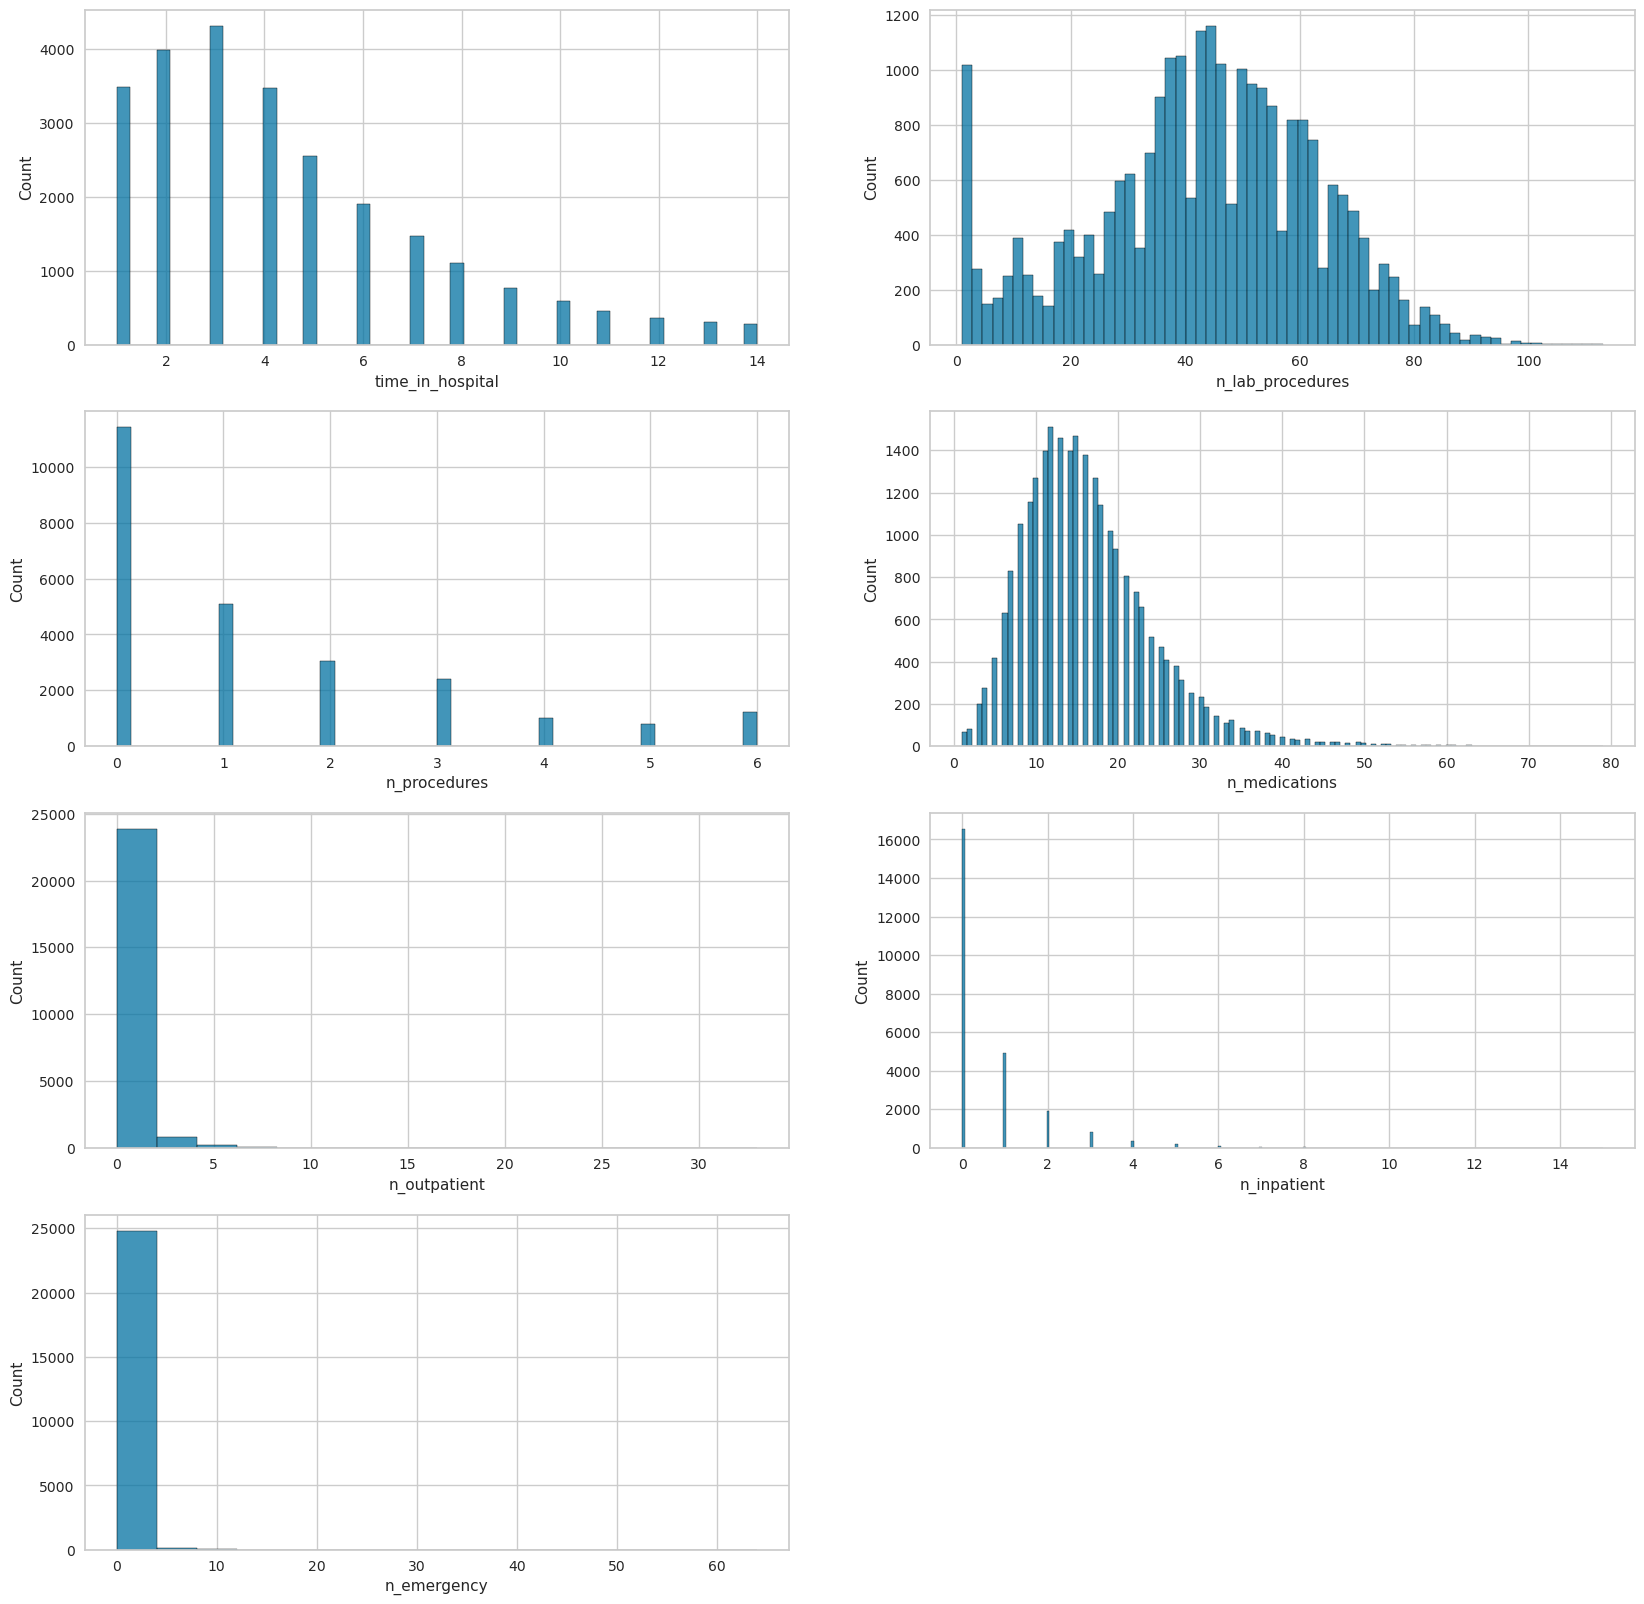

In [8]:
plt.figure(figsize = (20, 20))

plt.subplot(4, 2, 1)
sns.histplot(x = df['time_in_hospital'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = df['n_lab_procedures'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = df['n_procedures'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = df['n_medications'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = df['n_outpatient'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = df['n_inpatient'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = df['n_emergency'], kde = False)

#### Looking at the boxplots we can see that we have some outliers but let's keep them for now.

<AxesSubplot:title={'center':'Boxplot time_in_hospital'}, xlabel='time_in_hospital'>

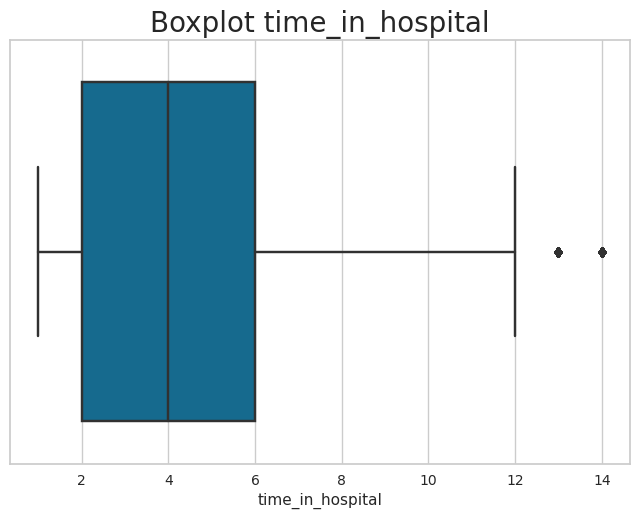

In [10]:
plt.title("Boxplot time_in_hospital", fontdict = {'fontsize': 20})
sns.boxplot(x=df["time_in_hospital"])

<AxesSubplot:title={'center':'Boxplot n_lab_procedures'}, xlabel='n_lab_procedures'>

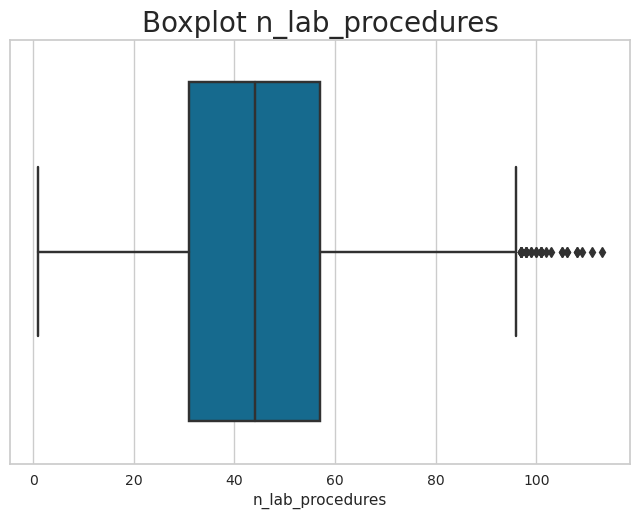

In [11]:
plt.title("Boxplot n_lab_procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_lab_procedures"])

<AxesSubplot:title={'center':'Boxplot n_procedures'}, xlabel='n_procedures'>

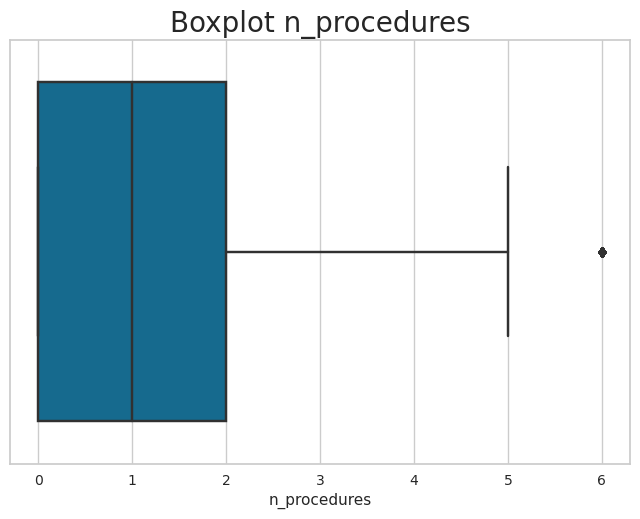

In [12]:
plt.title("Boxplot n_procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_procedures"])

<AxesSubplot:title={'center':'Boxplot n_medications'}, xlabel='n_medications'>

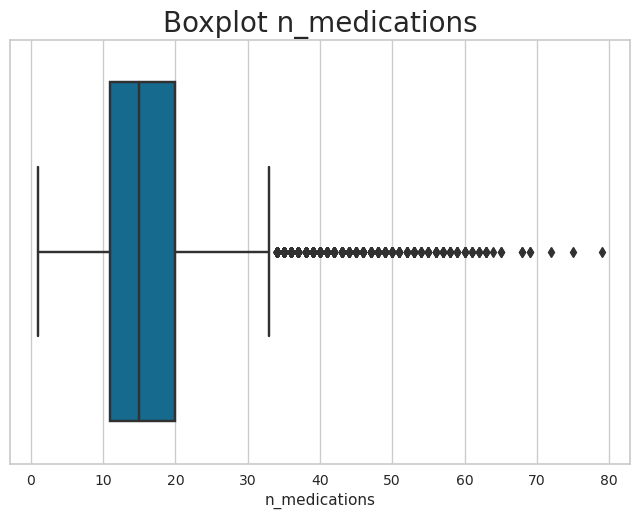

In [13]:
plt.title("Boxplot n_medications", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_medications"])

<AxesSubplot:title={'center':'Boxplot n_medications'}, xlabel='n_medications'>

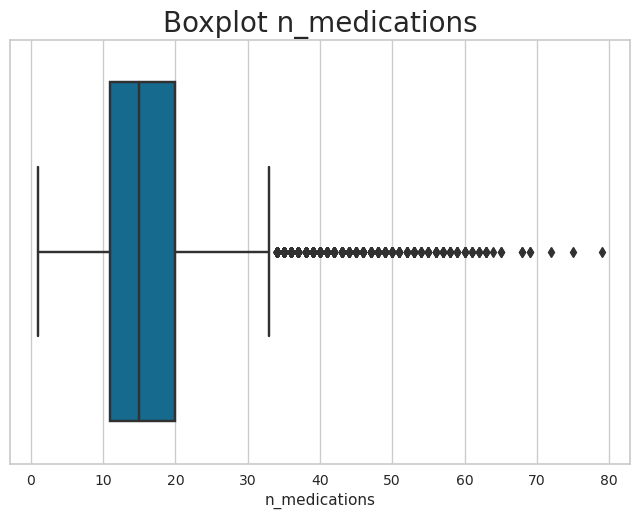

In [14]:
plt.title("Boxplot n_medications", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_medications"])

<AxesSubplot:title={'center':'Boxplot n_outpatient'}, xlabel='n_outpatient'>

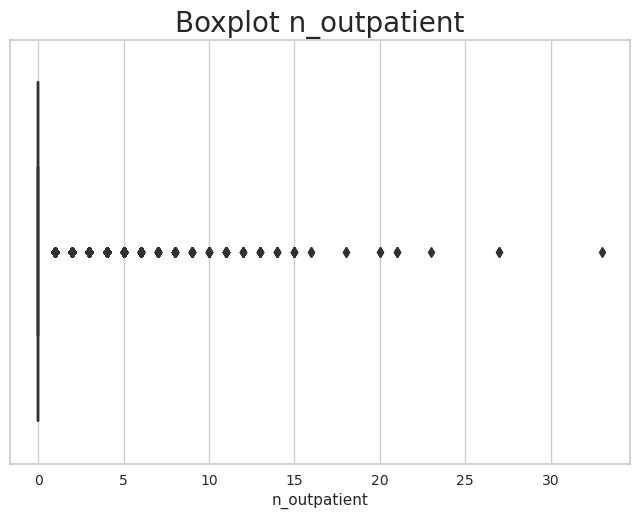

In [15]:
plt.title("Boxplot n_outpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_outpatient"])

<AxesSubplot:title={'center':'Boxplot n_outpatient'}, xlabel='n_outpatient'>

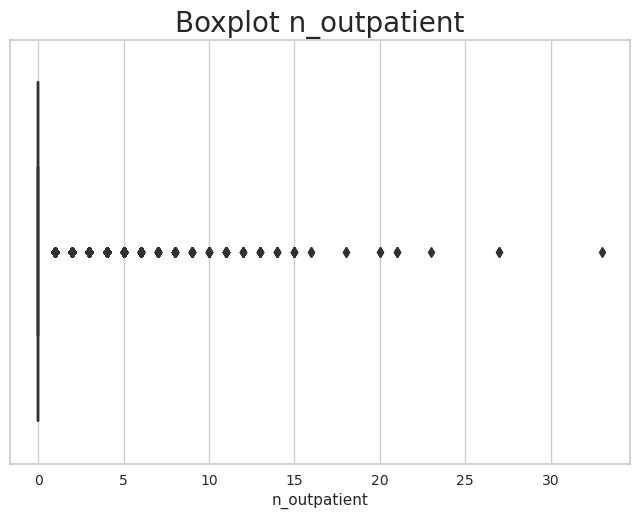

In [16]:
plt.title("Boxplot n_outpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_outpatient"])

<AxesSubplot:title={'center':'Boxplot n_inpatient'}, xlabel='n_inpatient'>

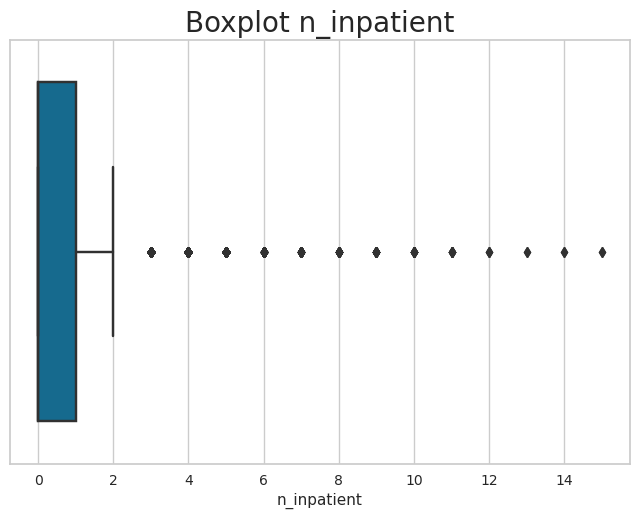

In [17]:
plt.title("Boxplot n_inpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_inpatient"])

<AxesSubplot:title={'center':'Boxplot n_inpatient'}, xlabel='n_inpatient'>

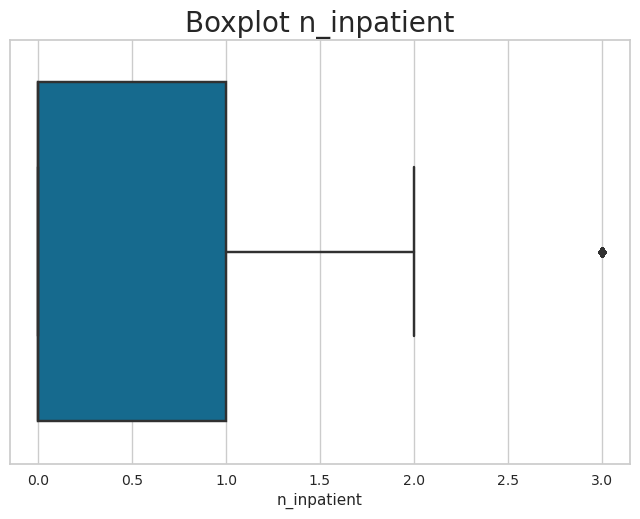

In [43]:
plt.title("Boxplot n_inpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_inpatient"])

<AxesSubplot:title={'center':'Boxplot n_emergency'}, xlabel='n_emergency'>

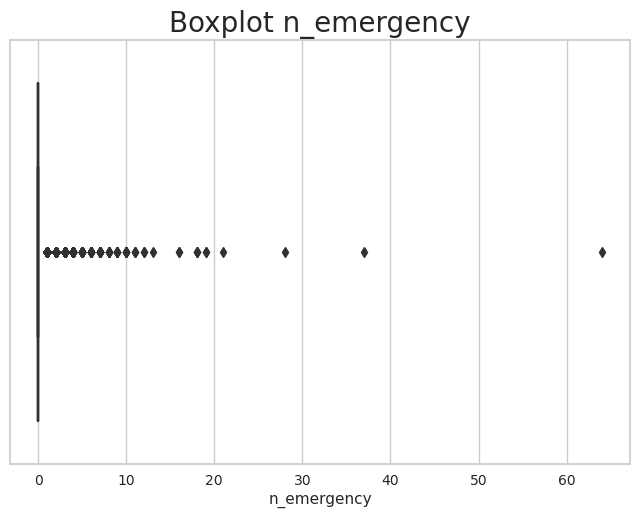

In [18]:
plt.title("Boxplot n_emergency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_emergency"])

<AxesSubplot:title={'center':'Boxplot n_emergency'}, xlabel='n_emergency'>

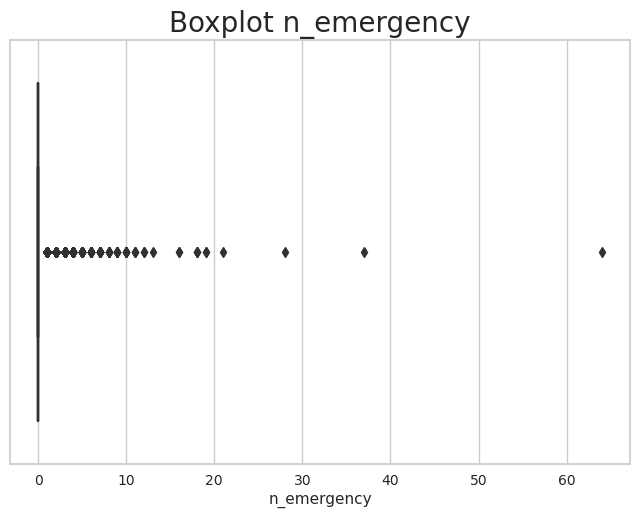

In [19]:
plt.title("Boxplot n_emergency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_emergency"])

#### Bivariate Analysis

#### When we compare our categorical variables we see that we don't have any distortion between them compared to the target variable.

<AxesSubplot:xlabel='diag_3', ylabel='count'>

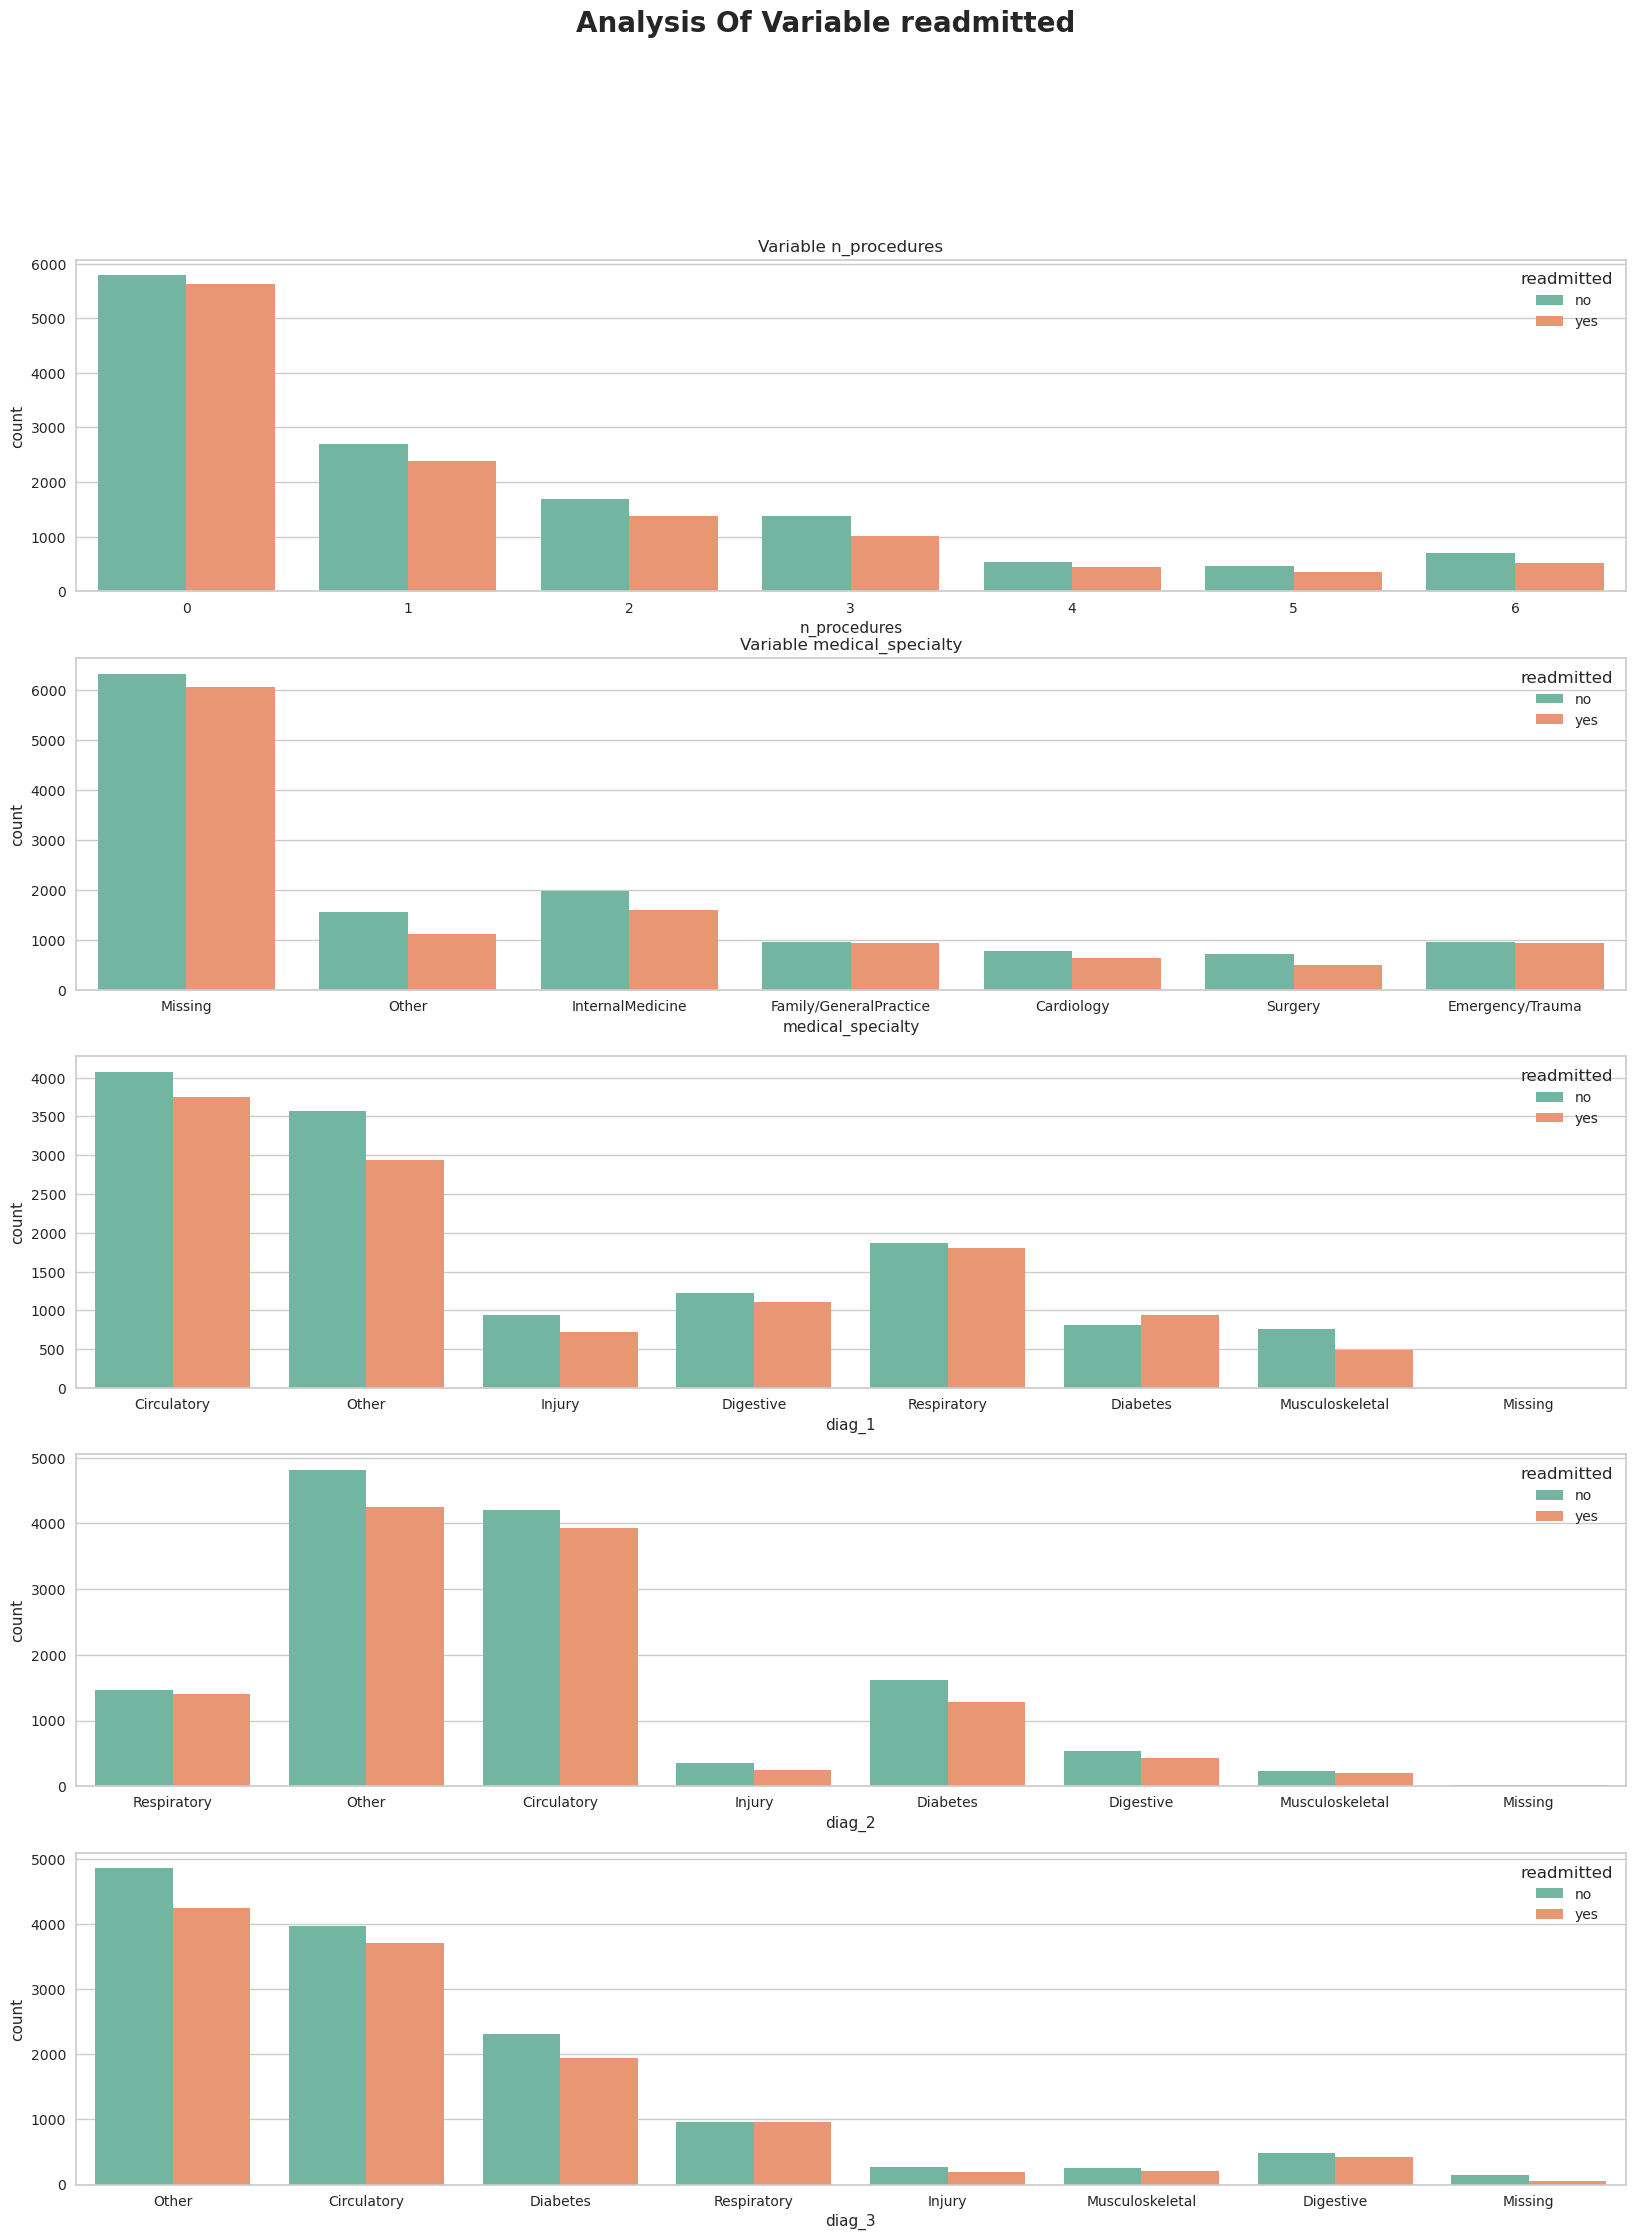

In [9]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable readmitted",fontweight="bold", fontsize=20)

plt.subplot(5, 1, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'n_procedures', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 2)
plt.gca().set_title('Variable medical_specialty')
sns.countplot(x = 'medical_specialty', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 3)
sns.countplot(x = 'diag_1', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 4)
sns.countplot(x = 'diag_2', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 5)
sns.countplot(x = 'diag_3', hue = 'readmitted', palette = 'Set2', data = df)

<AxesSubplot:title={'center':'Variable diabetes_med'}, xlabel='diabetes_med', ylabel='count'>

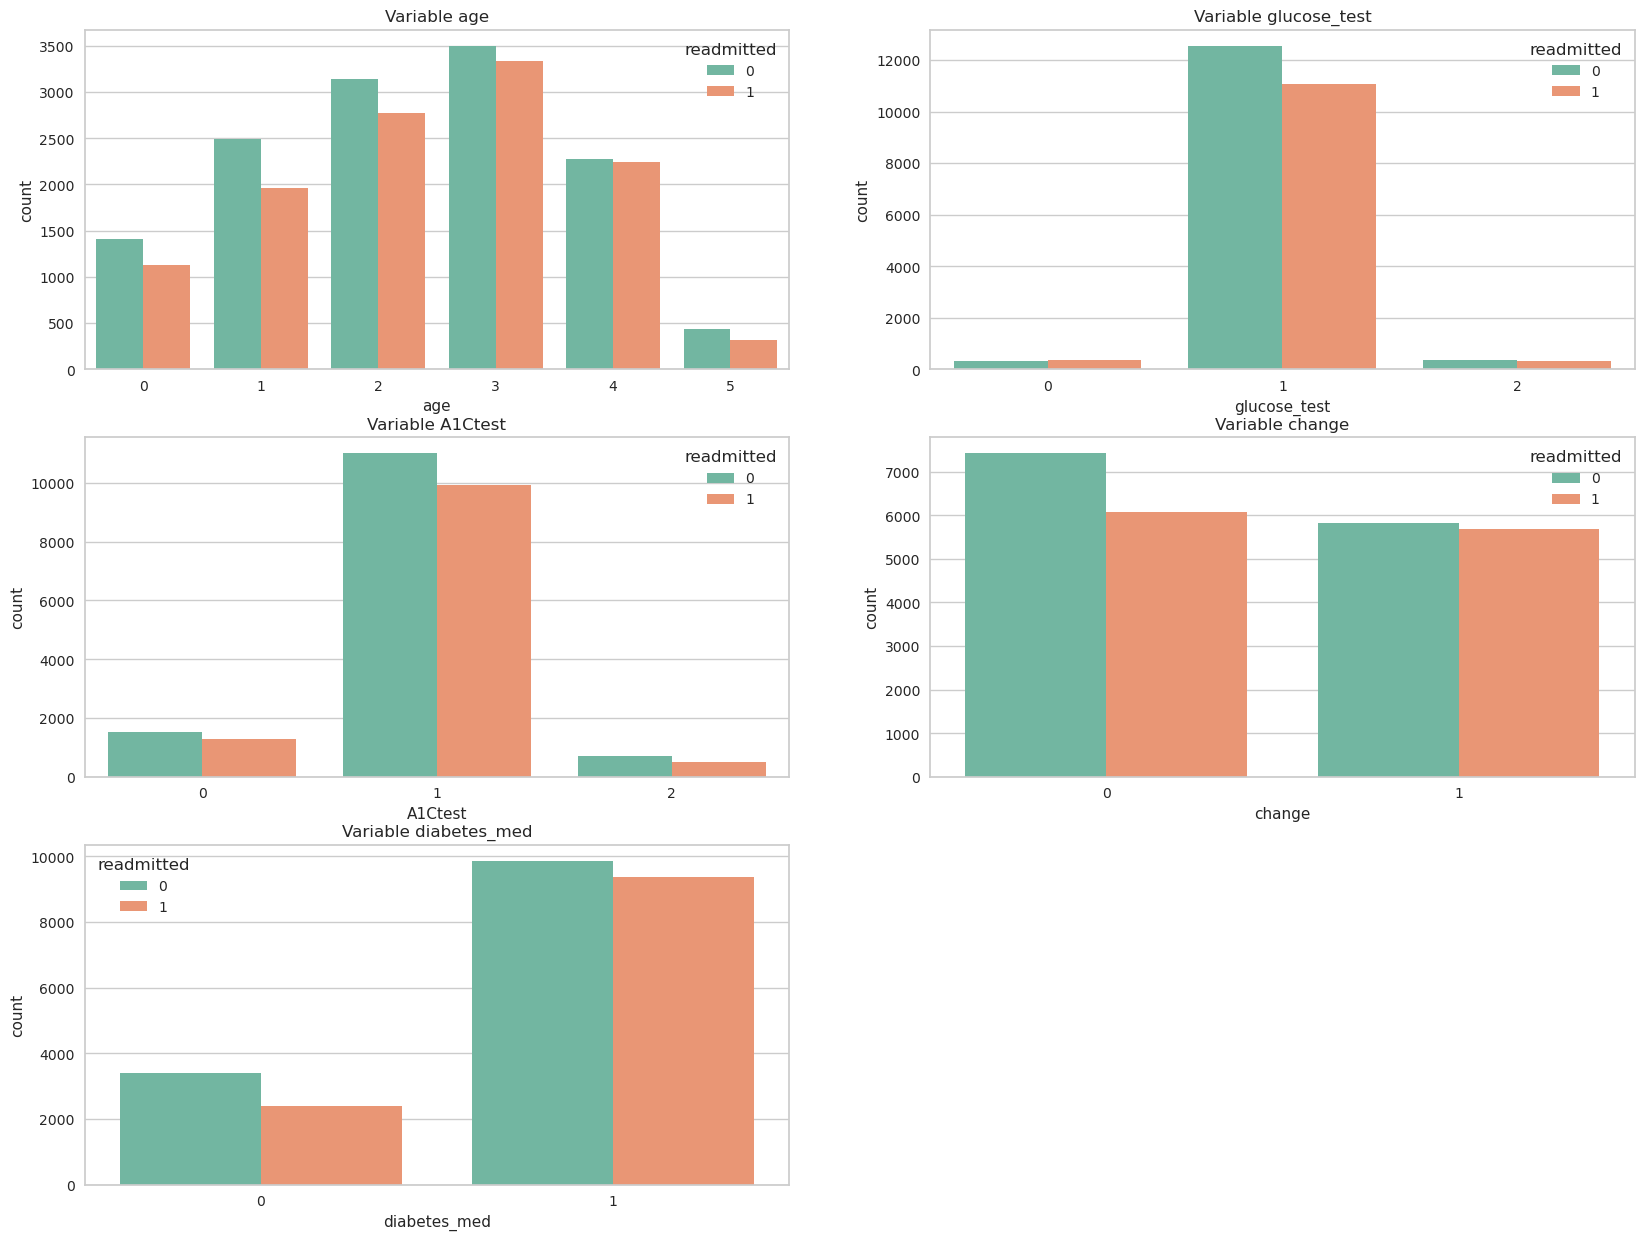

In [134]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 2, 1)
plt.gca().set_title('Variable age')
sns.countplot(x = 'age', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 2)
plt.gca().set_title('Variable glucose_test')
sns.countplot(x = 'glucose_test', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 3)
plt.gca().set_title('Variable A1Ctest')
sns.countplot(x = 'A1Ctest', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 4)
plt.gca().set_title('Variable change')
sns.countplot(x = 'change', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 5)
plt.gca().set_title('Variable diabetes_med')
sns.countplot(x = 'diabetes_med', hue = 'readmitted',  palette = 'Set2', data = df)

#### Looking at our continuous variables with the target variable, I also cannot see any different large pattern between the variables.

<AxesSubplot:xlabel='readmitted', ylabel='n_emergency'>

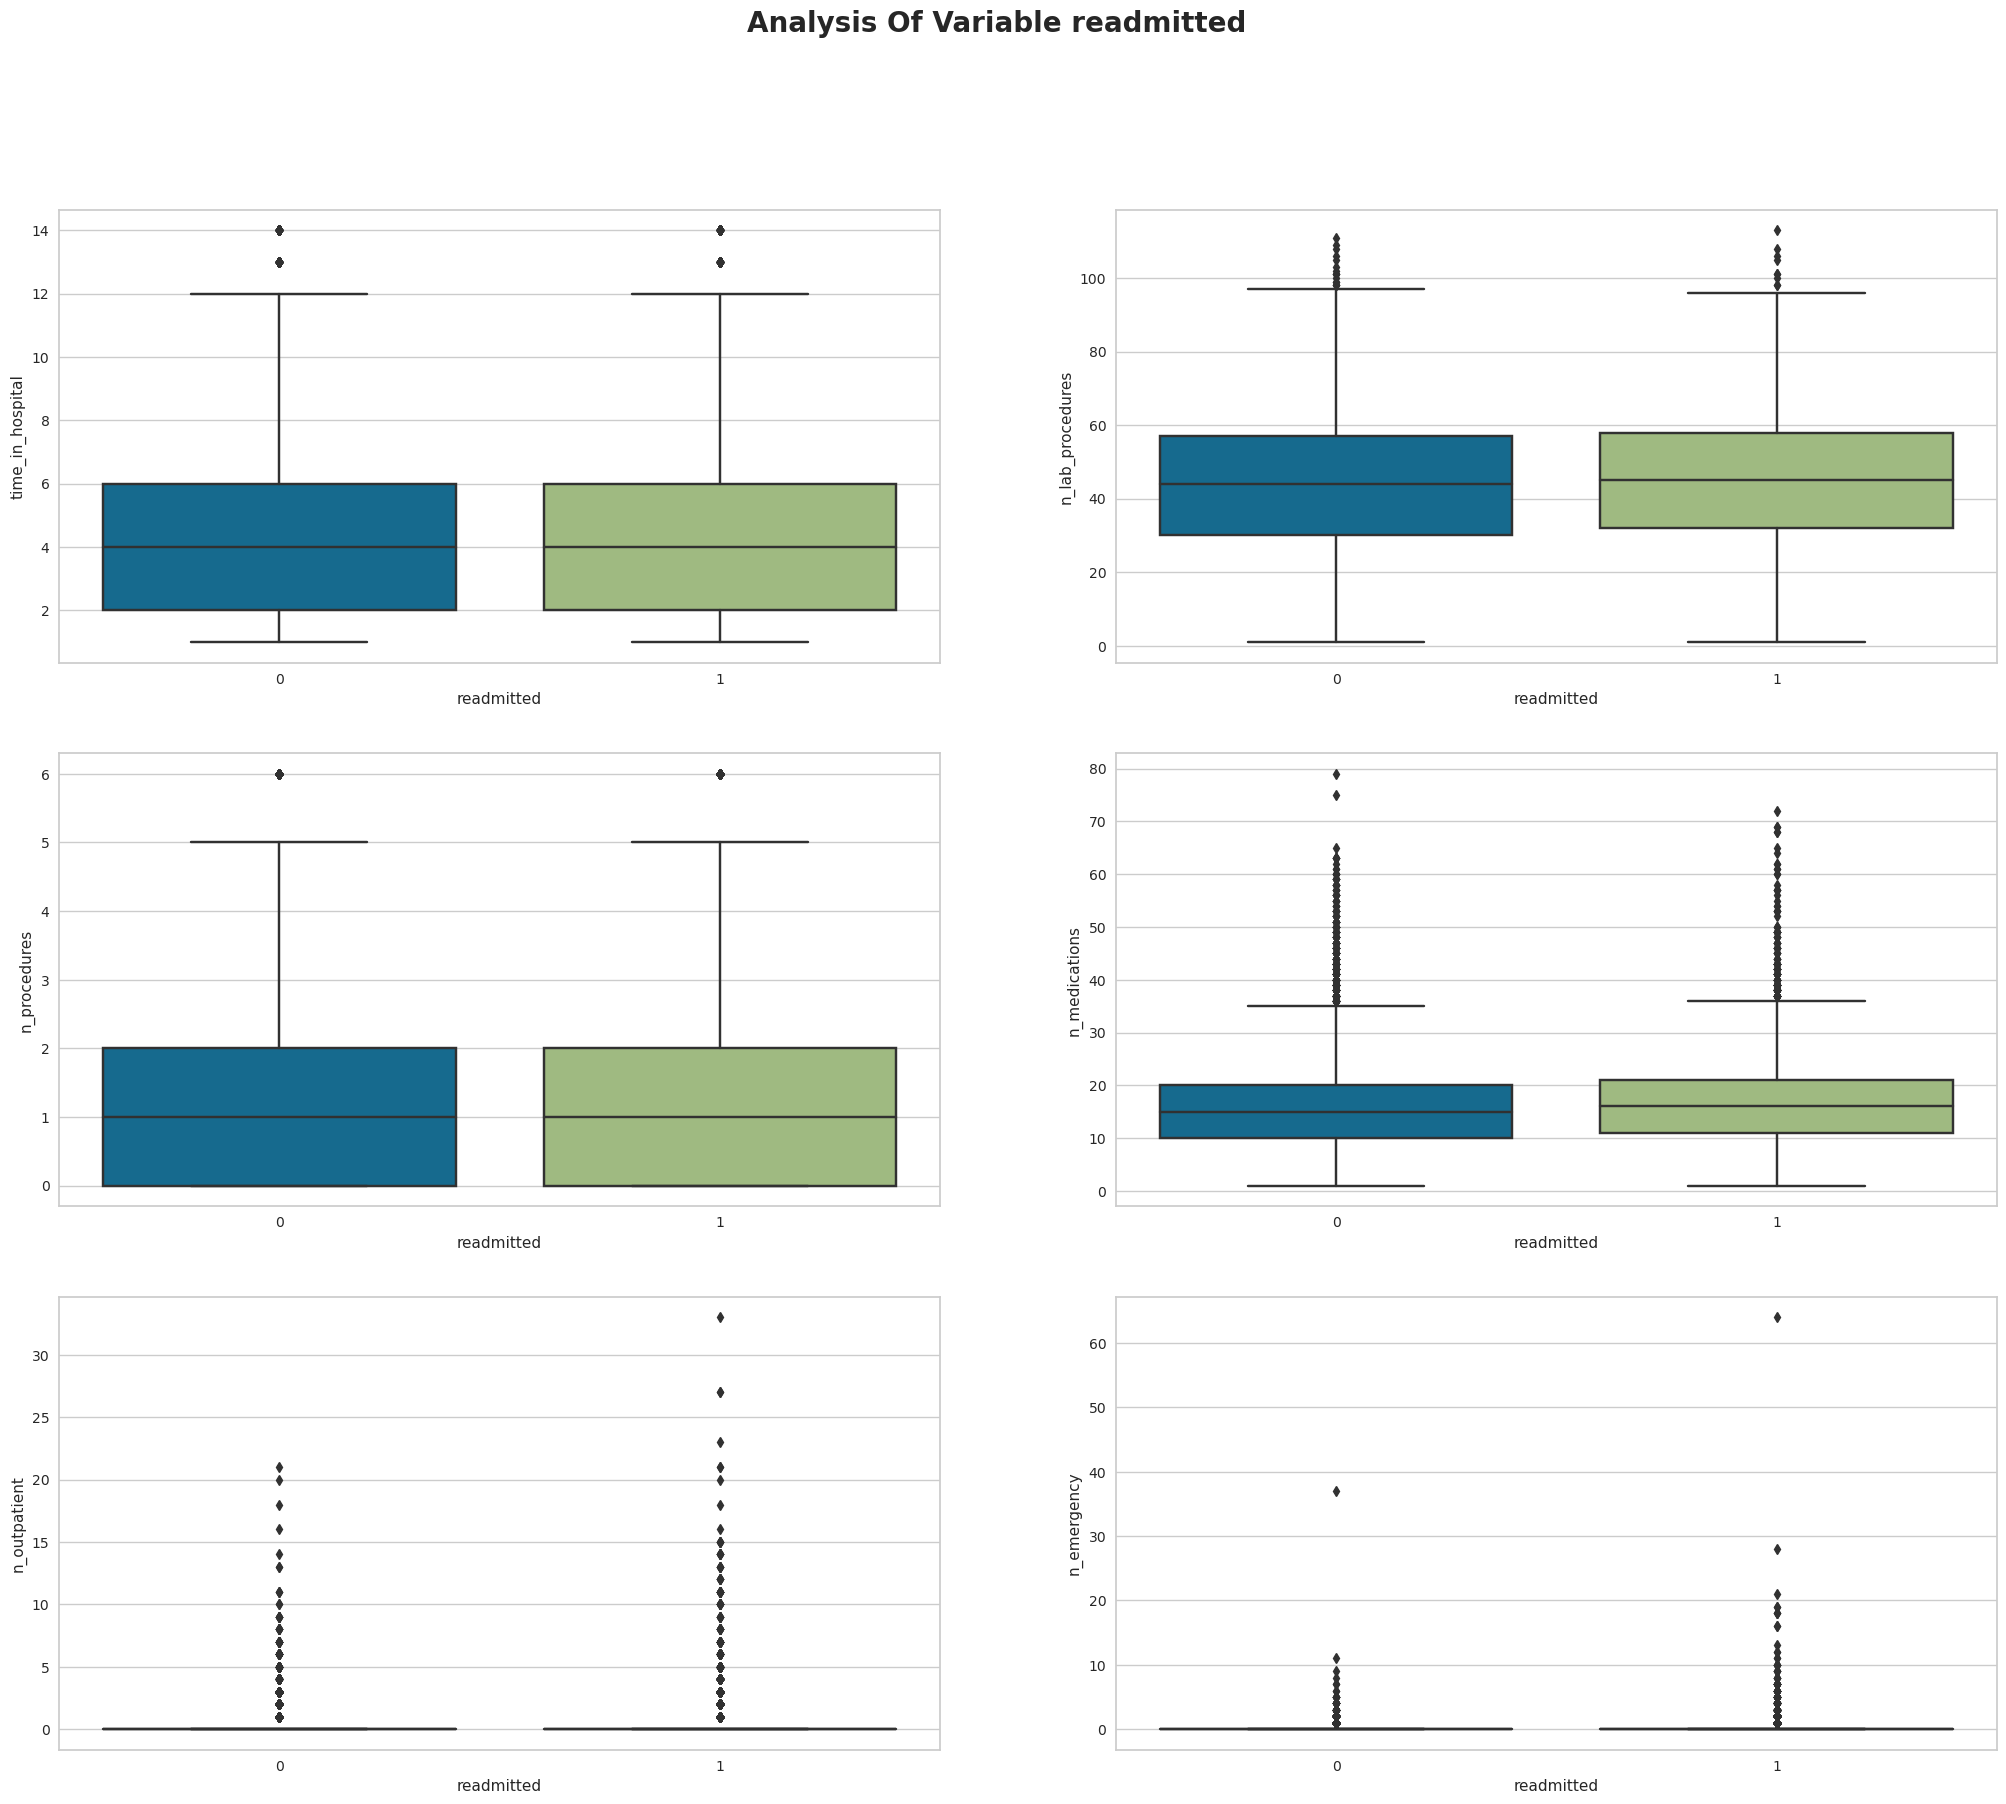

In [135]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable readmitted",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="readmitted", y="time_in_hospital", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="readmitted", y="n_lab_procedures", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="readmitted", y="n_procedures", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="readmitted", y="n_medications", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="readmitted", y="n_outpatient", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="readmitted", y="n_emergency", data=df)

## <font color='blue'> 3. Model Building. </font>

#### Label Encoder
- Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder_age = LabelEncoder()
label_encoder_medical_specialty = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_readmitted = LabelEncoder()
label_encoder_change = LabelEncoder()

df['age'] = label_encoder_age.fit_transform(df['age'])
df['medical_specialty'] = label_encoder_medical_specialty.fit_transform(df['medical_specialty'])
df['diag_1'] = label_encoder_diag_1.fit_transform(df['diag_1'])
df['diag_2'] = label_encoder_diag_2.fit_transform(df['diag_2'])
df['diag_3'] = label_encoder_diag_3.fit_transform(df['diag_3'])
df['glucose_test'] = label_encoder_glucose_test.fit_transform(df['glucose_test'])
df['A1Ctest'] = label_encoder_A1Ctest.fit_transform(df['A1Ctest'])
df['diabetes_med'] = label_encoder_diabetes_med.fit_transform(df['diabetes_med'])
df['readmitted'] = label_encoder_readmitted.fit_transform(df['readmitted'])
df['change'] = label_encoder_change.fit_transform(df['change'])

#### Separating into features variables and target variable.

In [21]:
X = df.drop('readmitted', axis = 1)
X = X.values
y = df['readmitted']

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Naive Bayes
- Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

#### We had 57,93% accuracy, It's definitely not a good model, the model learned the negative result but did not learn the positive result.

0.5793333333333334

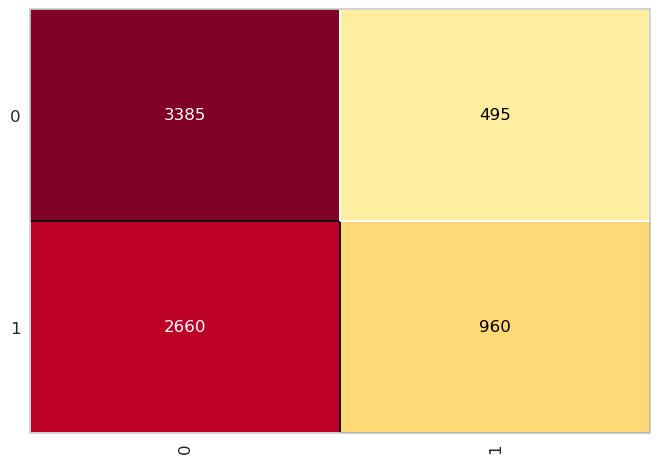

In [24]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [26]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.56      0.87      0.68      3880
           1       0.66      0.27      0.38      3620

    accuracy                           0.58      7500
   macro avg       0.61      0.57      0.53      7500
weighted avg       0.61      0.58      0.54      7500



In [25]:
score_naive_gaussian = 0.5793333333333334

#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [27]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  5
Max Nvl:  6
Algorithm:  entropy
Score:  0.6085142857142858


#### Running Decision Tree

#### We had 60,08% accuracy, It's definitely not a good model, the model can't learn both outcomes.

0.6008

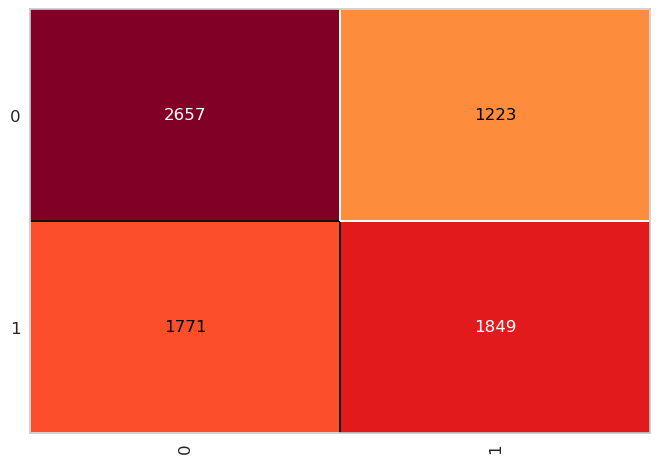

In [28]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, max_depth= 6, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [29]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3880
           1       0.60      0.51      0.55      3620

    accuracy                           0.60      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.60      0.60      0.60      7500



In [30]:
score_tree = 0.6008

#### Checking the most important variables of the model.

In [31]:
columns = df.drop('readmitted', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

n_inpatient          0.583138
n_outpatient         0.092084
n_lab_procedures     0.057160
age                  0.056925
n_emergency          0.055719
n_medications        0.055368
diabetes_med         0.029257
medical_specialty    0.021766
time_in_hospital     0.014918
diag_3               0.011633
diag_1               0.010595
A1Ctest              0.004892
diag_2               0.003362
glucose_test         0.003183
n_procedures         0.000000
change               0.000000
dtype: float64

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [32]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.6218857142857143
Mín Split:  5
Max Nvl:  11


#### Running Random Forest

#### We had 60,69% accuracy, It's definitely not a good model, the model can't learn both outcomes.

0.6069333333333333

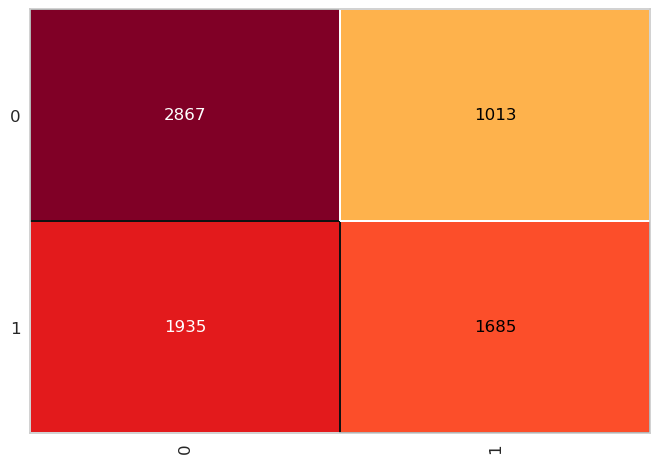

In [33]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [35]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      3880
           1       0.62      0.47      0.53      3620

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.61      0.61      0.60      7500



In [34]:
score_random = 0.6069333333333333

#### Checking the most important variables of the model

In [36]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

n_inpatient          0.194800
n_lab_procedures     0.118835
n_medications        0.118370
time_in_hospital     0.072643
age                  0.061712
n_outpatient         0.060871
medical_specialty    0.055067
diag_1               0.052950
n_procedures         0.049127
n_emergency          0.048385
diag_3               0.046730
diag_2               0.042728
A1Ctest              0.022605
diabetes_med         0.019586
glucose_test         0.019564
change               0.016025
dtype: float64

#### Extra Trees
- Here we will use the Extra Trees Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.6037142857142858


#### Running Extra Trees

#### We had 58,70% accuracy, It's definitely not a good model, the model can't learn both outcomes.

0.5870666666666666

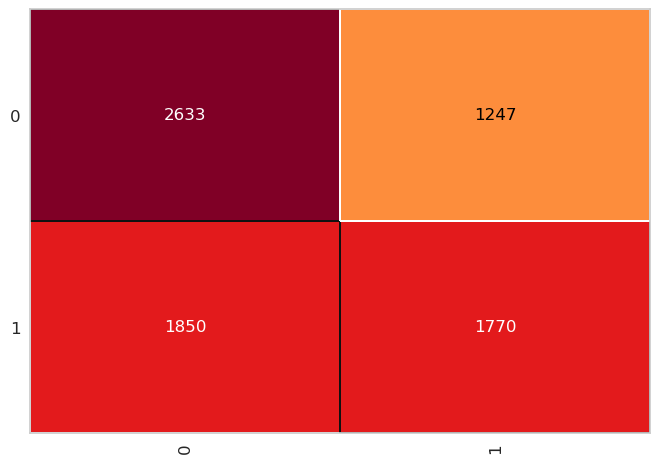

In [38]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [39]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      3880
           1       0.59      0.49      0.53      3620

    accuracy                           0.59      7500
   macro avg       0.59      0.58      0.58      7500
weighted avg       0.59      0.59      0.58      7500



In [41]:
score_extra = 0.5870666666666666

#### Checking the most important variables of the model

In [42]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

n_lab_procedures     0.130718
n_medications        0.126527
time_in_hospital     0.100455
age                  0.080151
medical_specialty    0.078584
diag_3               0.073610
diag_2               0.071151
n_procedures         0.067848
n_inpatient          0.067602
diag_1               0.064758
n_outpatient         0.039976
A1Ctest              0.031888
n_emergency          0.028451
glucose_test         0.016867
change               0.013837
diabetes_med         0.007578
dtype: float64

#### K-Means
- Here we will use the K Means Model.

#### We had 48,16% accuracy, It's definitely not a good model.

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

score_kmeans = 0.4816

0.4816


#### K-Neighbors
- Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Here we will use the GridSearch to figure out the best metrics to use in this model.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 8}, 0.5476571428571428)

#### Running KNN

#### We had 54,28% accuracy, It's definitely not a good model, the model learned the negative result but did not learn the positive result.

0.5428

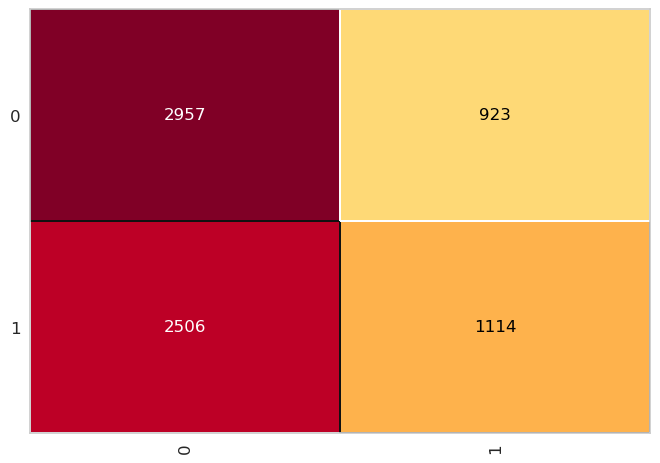

In [46]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [47]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.54      0.76      0.63      3880
           1       0.55      0.31      0.39      3620

    accuracy                           0.54      7500
   macro avg       0.54      0.53      0.51      7500
weighted avg       0.54      0.54      0.52      7500



In [48]:
score_knn = 0.5428

#### Logistic Regression

#### We had 59,90% accuracy, It's definitely not a good model, the model learned the negative result but did not learn the positive result.

0.5990666666666666

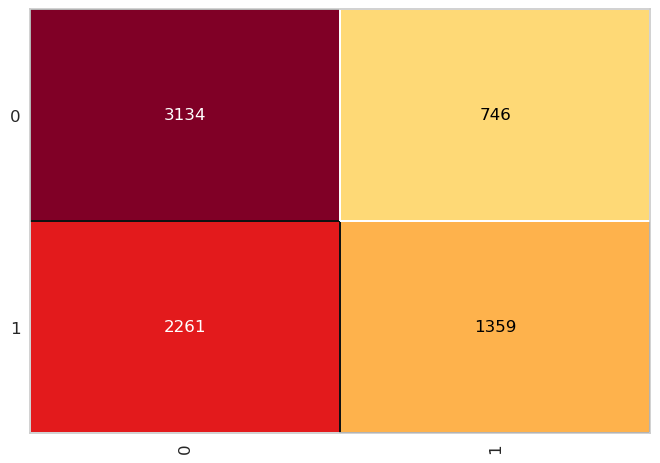

In [49]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [50]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.58      0.81      0.68      3880
           1       0.65      0.38      0.47      3620

    accuracy                           0.60      7500
   macro avg       0.61      0.59      0.58      7500
weighted avg       0.61      0.60      0.58      7500



In [51]:
logistic_normal = 0.5990666666666666

#### SVM
- Here we will use the SVM Model, we will test Three Kernels (Linear, RBF and Poly). Applying GridSearch

In [53]:
from sklearn.svm import SVC
model = SVC()

kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = np.array([3, 4, 5])
polinomio = np.array([2, 3, 4, 5])
gamma = ['auto', 'scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polinomio, 'gamma': gamma}
gridSVM = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2, n_jobs = -1)
gridSVM.fit(X_train, y_train)

print('Kernel: ', gridSVM.best_estimator_.kernel)
print('C: ', gridSVM.best_estimator_.C)
print('Polinomio', gridSVM.best_estimator_.degree)
print('Gamma', gridSVM.best_estimator_.gamma)
print('Score: ', gridSVM.best_score_)

Kernel:  rbf
C:  3
Polinomio 2
Gamma auto
Score:  0.6063428571428571


#### Running SVM

#### We had 59,50% accuracy, It's definitely not a good model.

0.5950666666666666

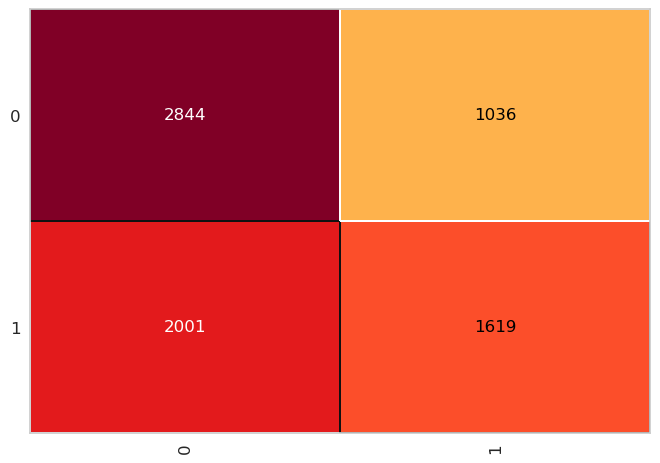

In [54]:
svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 1, C = 3.0)
svm.fit(X_train, y_train)
previsoes = svm.predict(X_test)

cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [55]:
svm = classification_report(y_test, previsoes)
print(svm)

              precision    recall  f1-score   support

           0       0.59      0.73      0.65      3880
           1       0.61      0.45      0.52      3620

    accuracy                           0.60      7500
   macro avg       0.60      0.59      0.58      7500
weighted avg       0.60      0.60      0.59      7500



In [57]:
score_svm = 0.5950666666666666

#### AdaBoost
- Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Applying GridSearch

In [58]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.4
Score:  0.6170285714285714


#### Running Ada Boost

#### We had 60,89% accuracy, It's definitely not a good model.

0.6089333333333333

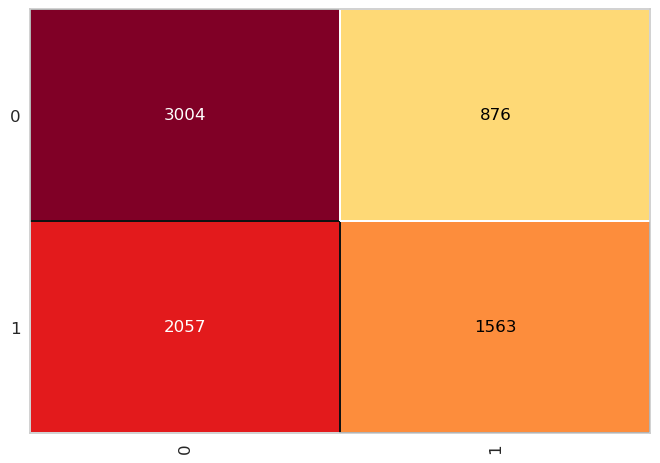

In [59]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.4, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [61]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      3880
           1       0.64      0.43      0.52      3620

    accuracy                           0.61      7500
   macro avg       0.62      0.60      0.59      7500
weighted avg       0.62      0.61      0.60      7500



In [60]:
score_ada_scaler = 0.6089333333333333

#### Gradient Boosting
- Here we will use the Gradient Boosting Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.05
Score:  0.6198285714285714


#### Running Gradient Boosting

#### We had 61,21% accuracy, It's definitely not a good model.

0.6121333333333333

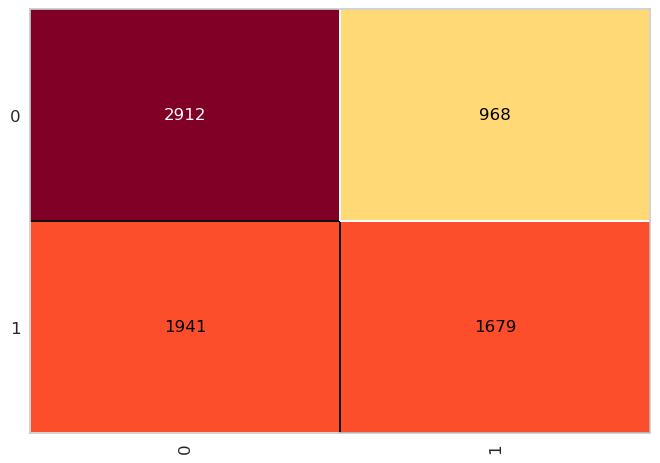

In [63]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [64]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3880
           1       0.63      0.46      0.54      3620

    accuracy                           0.61      7500
   macro avg       0.62      0.61      0.60      7500
weighted avg       0.62      0.61      0.60      7500



In [65]:
score_grad_standard = 0.6121333333333333

#### LGBM

- Here we will use the LGBM Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [17]:
from lightgbm import LGBMClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'min_child_samples': [1, 3, 5, 7, 9, 15],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
    
model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(X_train, y_train.ravel())

print('Score: ', lgbm_grid.best_score_)
print('Params: ', lgbm_grid.best_params_)

Score:  0.6213147534185949
Params:  {'subsample': 0.3, 'reg_lambda': 0.1, 'reg_alpha': 0.9, 'num_leaves': 5, 'n_estimators': 500, 'min_child_weight': 5, 'min_child_samples': 7, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


#### Running LGBM

#### We had 61,49% accuracy, It's definitely not a good model.

0.6149333333333333

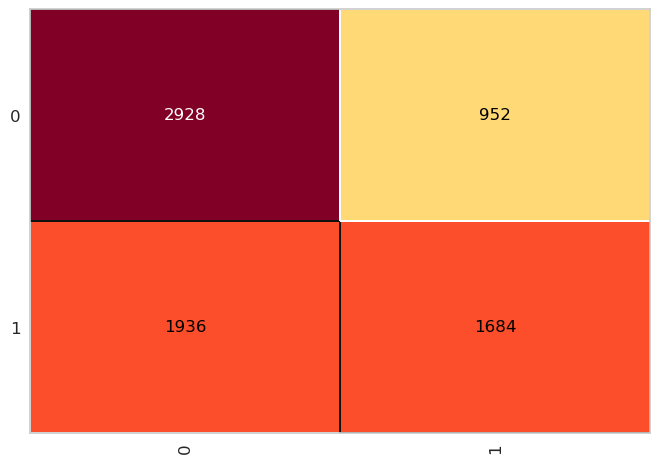

In [68]:
lgbm = LGBMClassifier(subsample = 0.3, reg_lambda = 0.1, reg_alpha = 0.9, n_estimators = 500, min_child_weight = 5, min_child_samples = 7, max_depth = 5, learning_rate = 0.05, num_leaves = 5, colsample_bytree = 0.5, random_state = 0)
lgbm.fit(X_train, y_train)
previsoes = lgbm.predict(X_test)

cm = ConfusionMatrix(lgbm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [69]:
classification_lgbm_standard = (classification_report(y_test, previsoes))
print(classification_lgbm_standard)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3880
           1       0.64      0.47      0.54      3620

    accuracy                           0.61      7500
   macro avg       0.62      0.61      0.60      7500
weighted avg       0.62      0.61      0.61      7500



In [70]:
score_lgbm_standard = 0.6149333333333333

#### XGB Boost

- Here we will use the XGB Boost Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [131]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.6200004807562048
Params:  {'subsample': 0.7, 'reg_lambda': 0.7, 'reg_alpha': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}


#### Running XGB

#### We had 61,09% accuracy, It's definitely not a good model.

0.6109333333333333

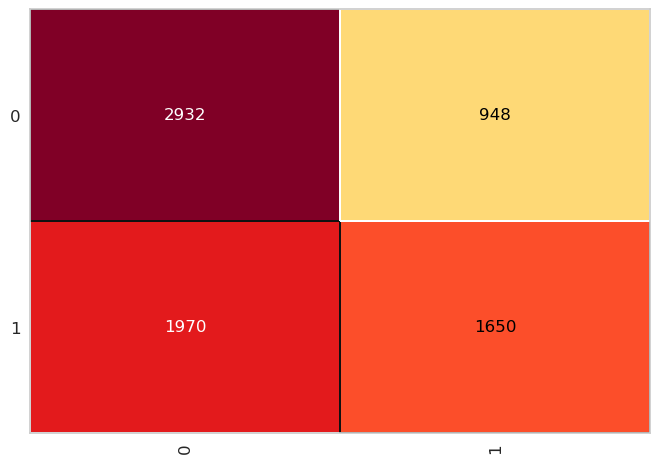

In [73]:
xgb = XGBClassifier(subsample = 0.7, reg_lambda = 0.7, reg_alpha = 0.9, n_estimators = 500, min_child_weight = 3, max_depth = 2, learning_rate = 0.05, gamma = 0.1, colsample_bytree = 0.5, random_state = 0)
xgb.fit(X_train, y_train)
previsoes = xgb.predict(X_test)

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [74]:
classification_xgb_standard = (classification_report(y_test, previsoes))
print(classification_xgb_standard)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3880
           1       0.64      0.46      0.53      3620

    accuracy                           0.61      7500
   macro avg       0.62      0.61      0.60      7500
weighted avg       0.62      0.61      0.60      7500



In [76]:
score_xgb = 0.6109333333333333

#### Checking key variables to predict the outcome.¶

- Chi 2

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
n_inpatient,2542.51
n_emergency,919.50
n_outpatient,889.07
n_lab_procedures,246.84
n_medications,135.86
n_procedures,107.53
time_in_hospital,94.12
change,25.21
diag_1,24.47
diabetes_med,22.29


- Decision Tree

In [78]:
feature_imp

n_inpatient          0.583138
n_outpatient         0.092084
n_lab_procedures     0.057160
age                  0.056925
n_emergency          0.055719
n_medications        0.055368
diabetes_med         0.029257
medical_specialty    0.021766
time_in_hospital     0.014918
diag_3               0.011633
diag_1               0.010595
A1Ctest              0.004892
diag_2               0.003362
glucose_test         0.003183
n_procedures         0.000000
change               0.000000
dtype: float64

- Random Forest

In [79]:
feature_imp_random

n_inpatient          0.194800
n_lab_procedures     0.118835
n_medications        0.118370
time_in_hospital     0.072643
age                  0.061712
n_outpatient         0.060871
medical_specialty    0.055067
diag_1               0.052950
n_procedures         0.049127
n_emergency          0.048385
diag_3               0.046730
diag_2               0.042728
A1Ctest              0.022605
diabetes_med         0.019586
glucose_test         0.019564
change               0.016025
dtype: float64

- Extra Trees

In [80]:
feature_extra

n_lab_procedures     0.130718
n_medications        0.126527
time_in_hospital     0.100455
age                  0.080151
medical_specialty    0.078584
diag_3               0.073610
diag_2               0.071151
n_procedures         0.067848
n_inpatient          0.067602
diag_1               0.064758
n_outpatient         0.039976
A1Ctest              0.031888
n_emergency          0.028451
glucose_test         0.016867
change               0.013837
diabetes_med         0.007578
dtype: float64

#### Checking the results.

In [81]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

svm = {'Model':'SVM',
               'Scaling':'Standard Data',
               'Type':'Poly',
               'Precision':score_svm}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

xgb_dict_v1 = {'Model':'XGB',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_xgb}

lgbm_dict_v1 = {'Model':'LGBM',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_lgbm_standard}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'SVM':pd.Series(svm),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'XGB':pd.Series(xgb_dict_v1),
                       'LGBM':pd.Series(lgbm_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,K-Means,KNN,Logistic Regression,SVM,AdaBoost,GradientBoosting,XGB,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Means,KNN,Logistic Regression,SVM,AdaBoost,GradientBoost,XGB,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,Standard Data,StandardScaler,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,Poly,-,-,-,-
Precision,0.579333,0.6008,0.606933,0.587067,0.4816,0.5428,0.599067,0.595067,0.608933,0.612133,0.610933,0.614933


## <font color='blue'> 4. Conclusion. </font>

#### We can see that we have numerical and continuous data, in our database we have a good amount of data, which makes our work easier, when we look at our data we can see that we do not have null values.

#### Looking at the correlation of our variables, we can see that we do not have strong correlations, which means that treatment is not necessary, looking at our categorical variables, we can see that we have some predominant values ​​in our database, when we look at the continuous variables we can see that the higher the number, generally the smaller the amount of data available, looking exclusively at our target variable we can see that we have a good balance of data.

#### When we go to the bivariate analysis we can see that we do not have a defined pattern between our explanatory variables and our target variable.

#### Going to the machine learning part, I did not get a satisfactory result with this data, I tried to remove outliers, use one hot label encoder, remove some variables but even so we were not successful in achieving good accuracy, our best model was the LGBM with 61.49%.

#### Looking at the most important variables to arrive at the result, practically all models presented the n_inpatient variable as the most important.

#### <font color='red'> if you liked the analysis, leave a "like" (up arrow), and comment what you think of the study, if you have any suggestions I would be happy to hear from you.. </font>